In [8]:
import pandas as pd
from sklearn import cluster, covariance, manifold
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
df = pd.read_csv('../data/drizl_features.csv')
labels = pd.read_csv('../data/drizl_5_labels.csv')

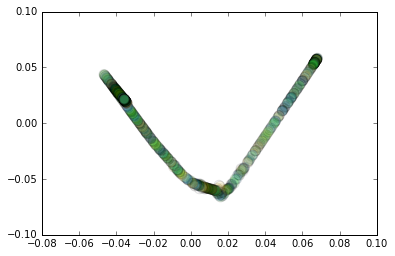

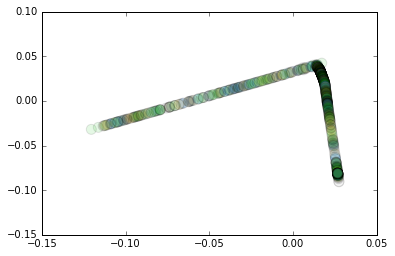

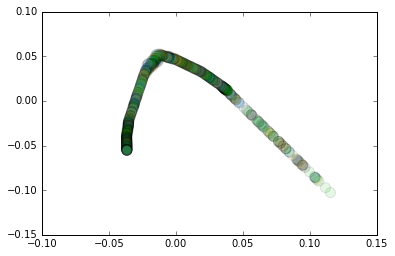

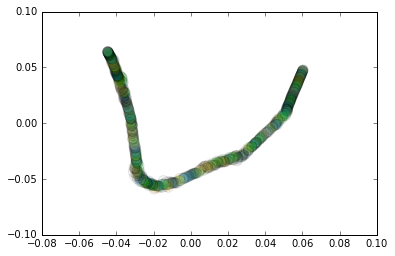

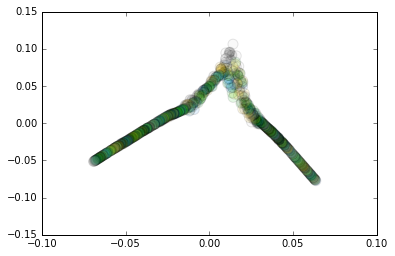

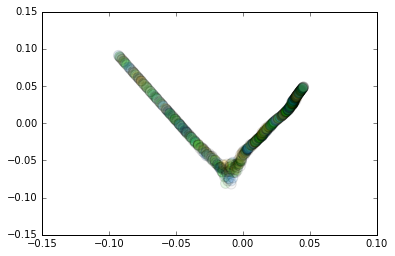

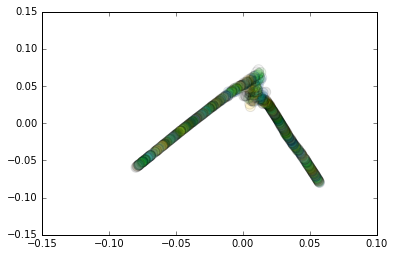

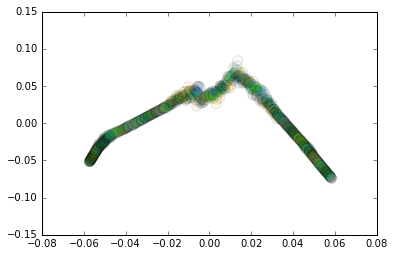

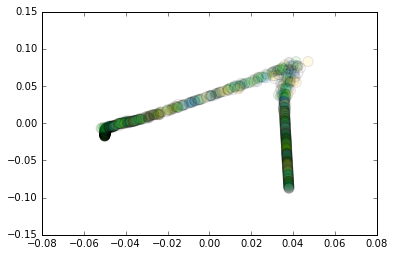

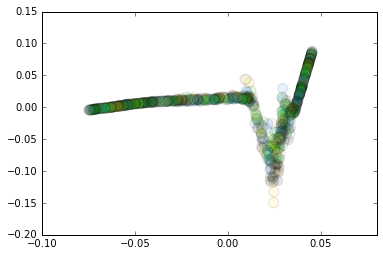

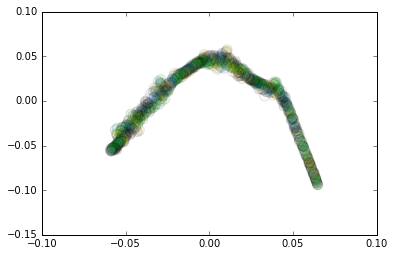

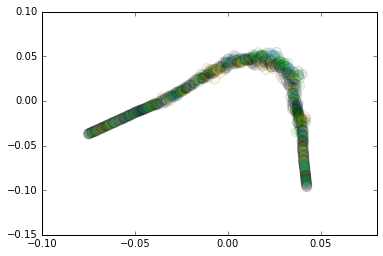

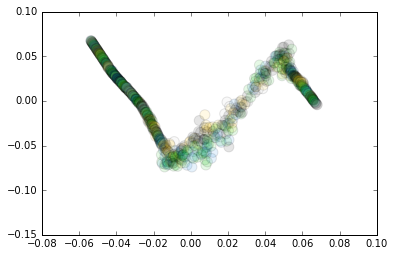

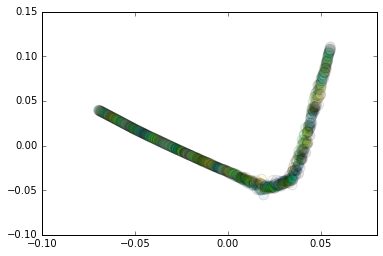

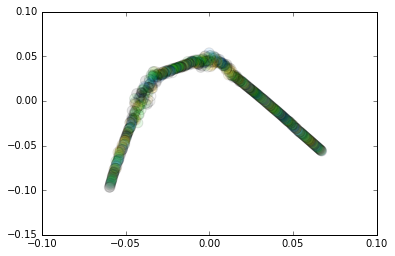

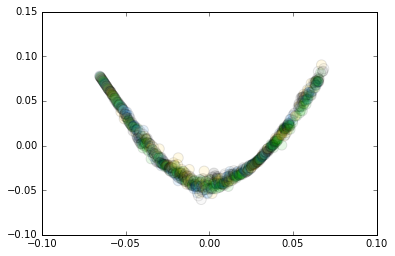

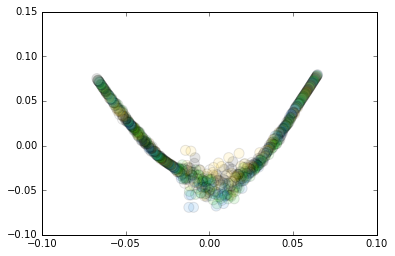

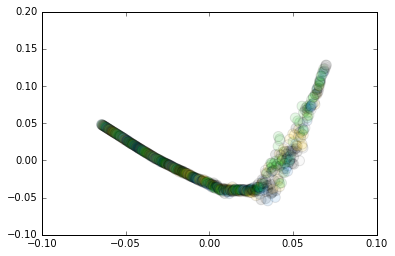

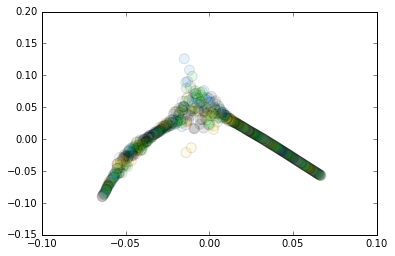

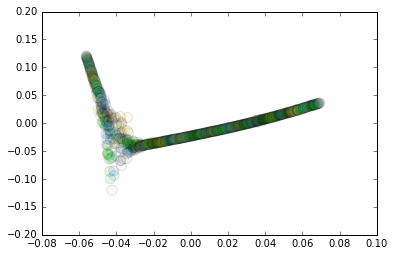

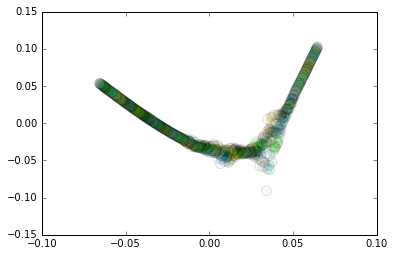

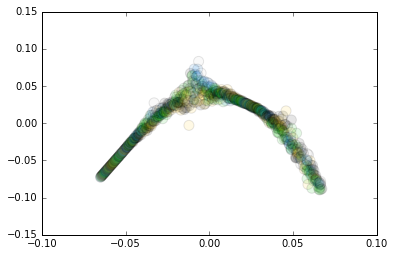

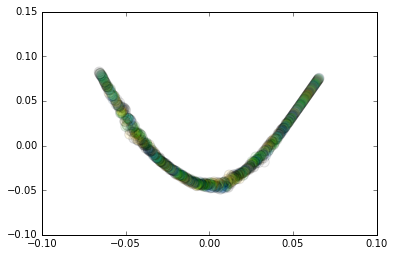

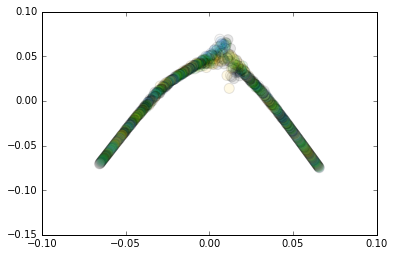

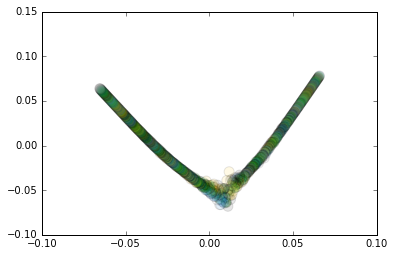

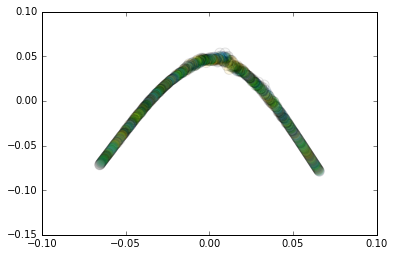

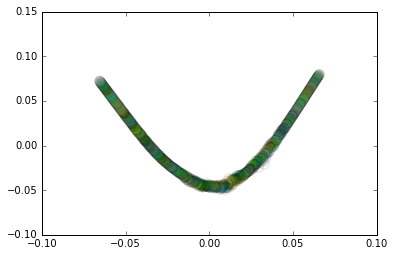

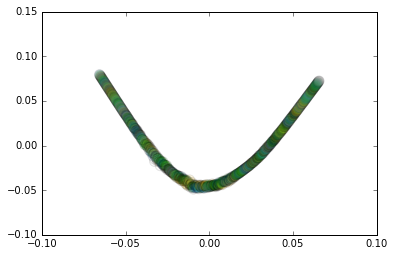

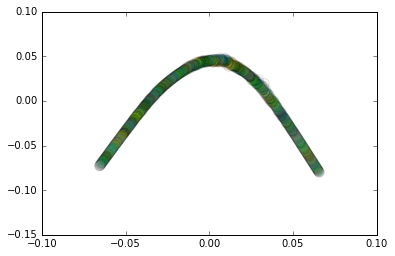

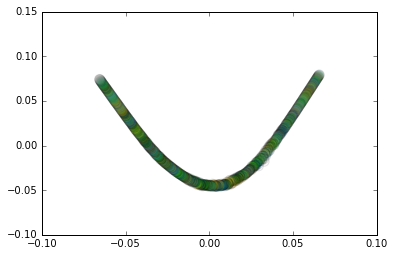

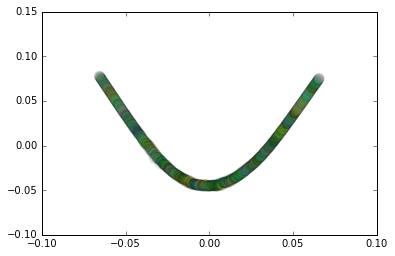

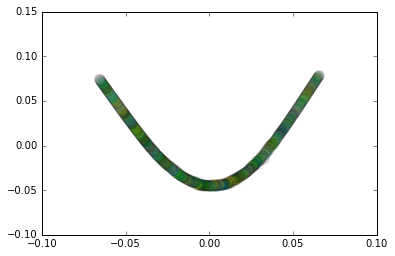

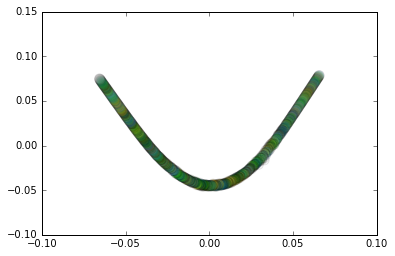

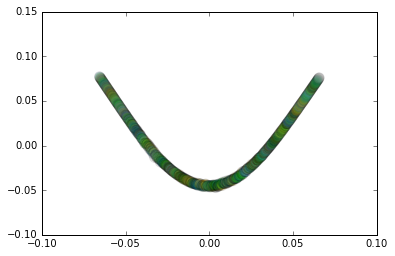

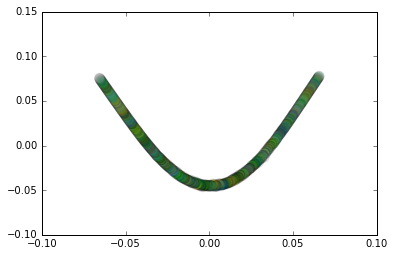

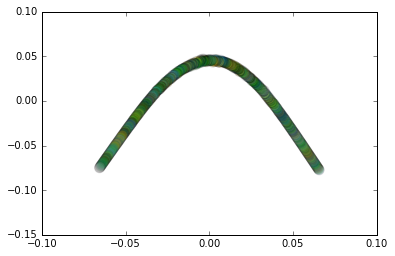

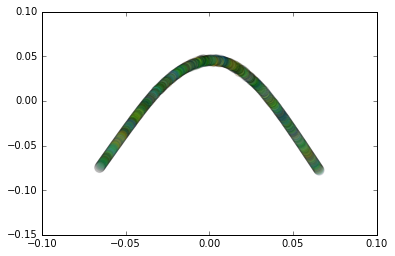

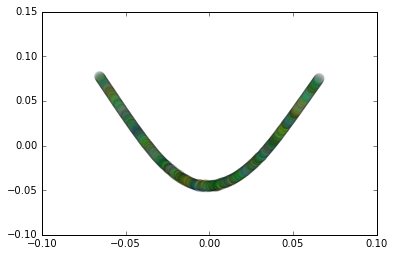

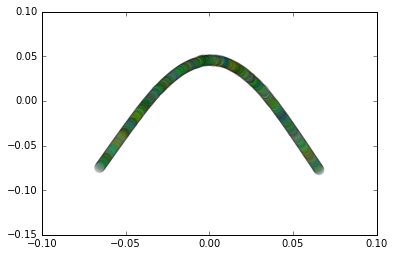

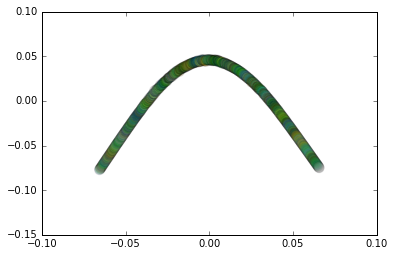

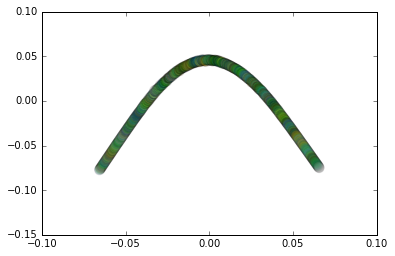

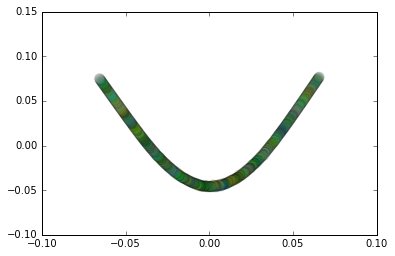

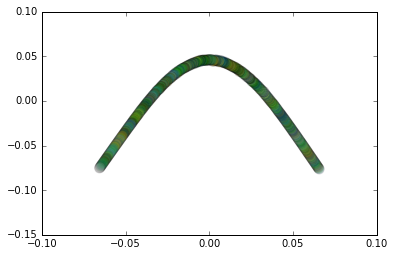

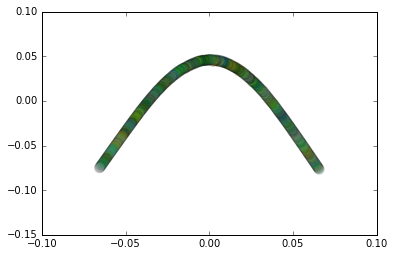

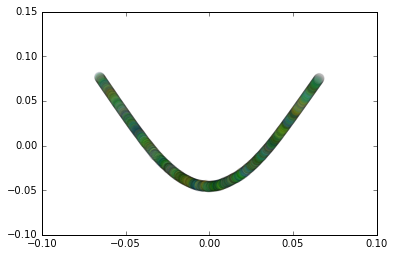

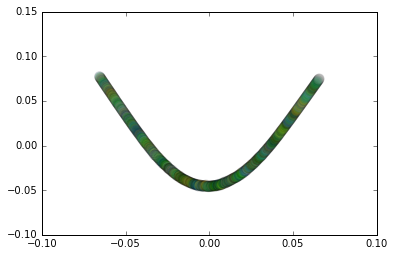

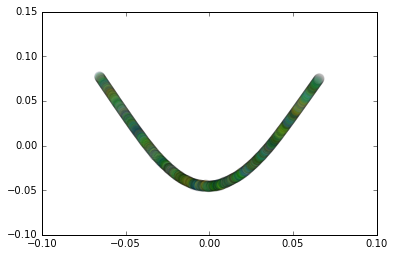

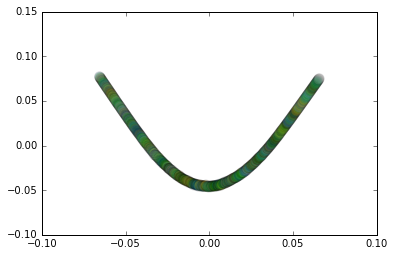

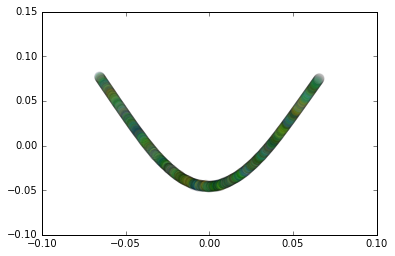

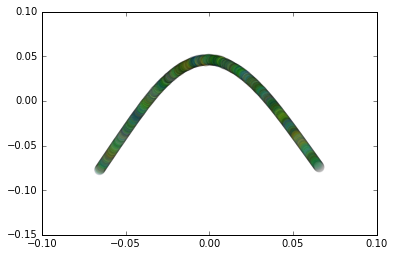

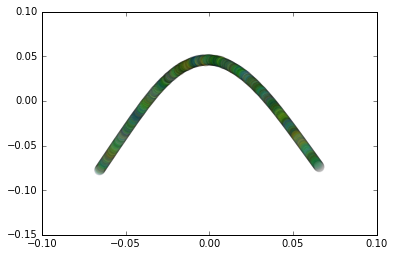

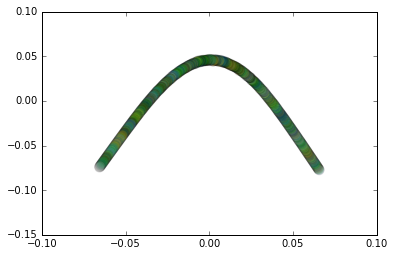

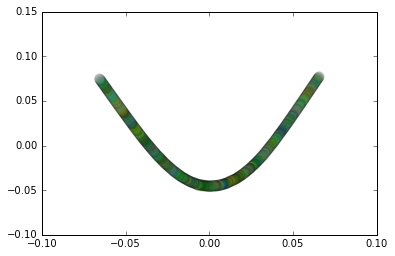

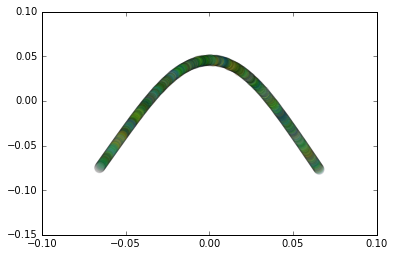

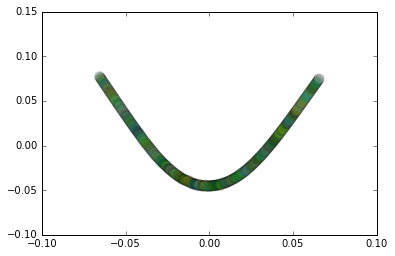

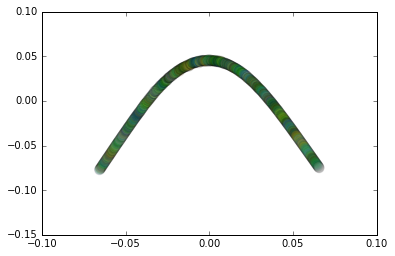

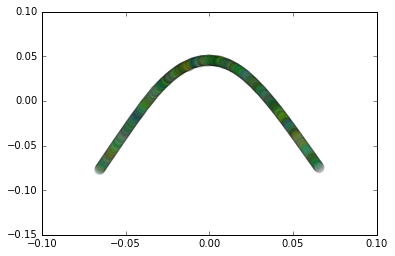

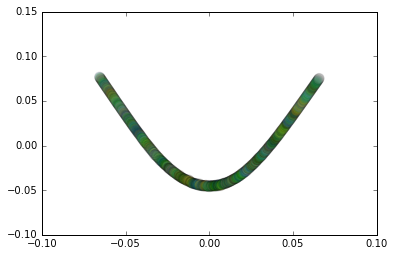

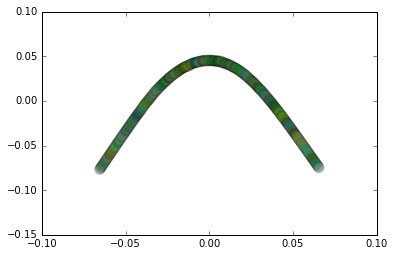

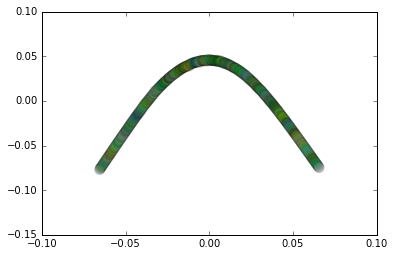

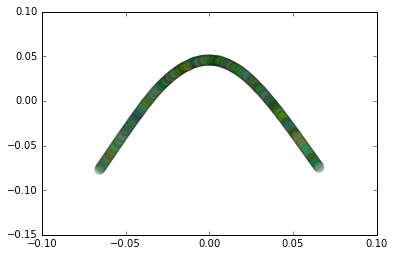

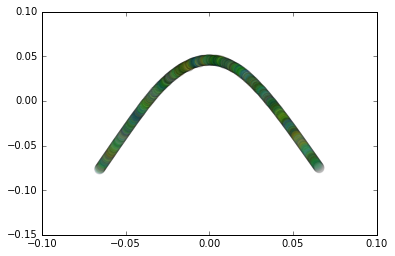

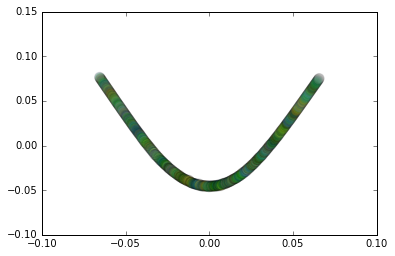

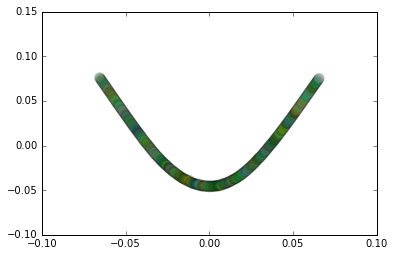

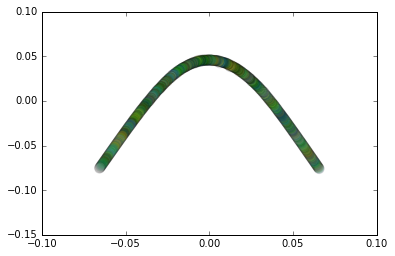

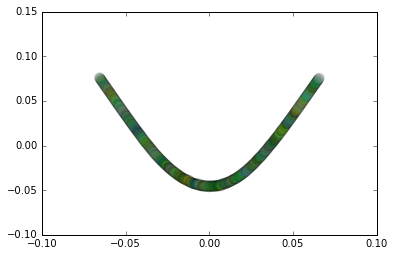

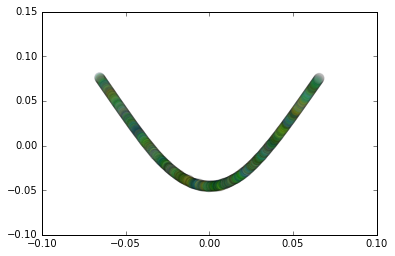

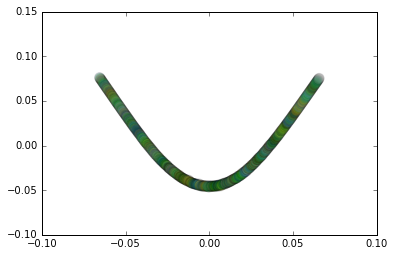

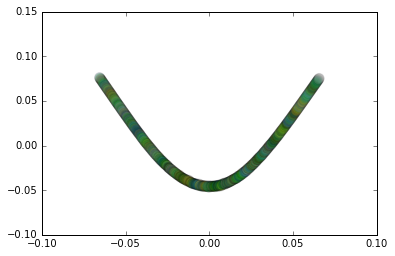

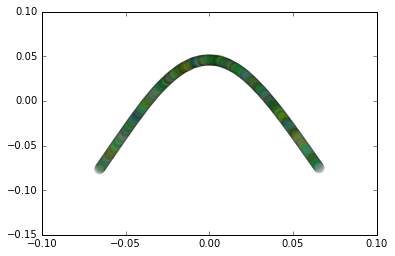

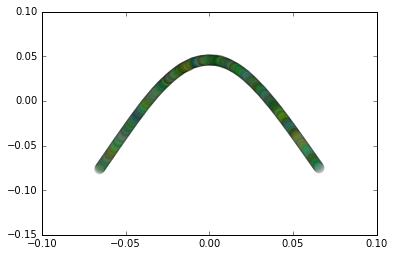

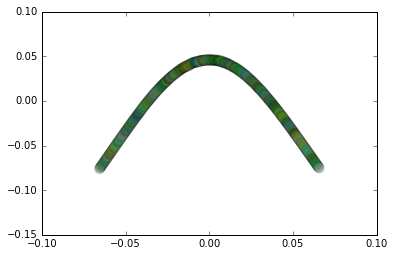

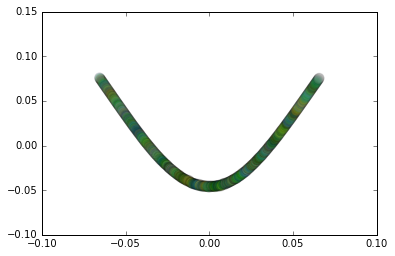

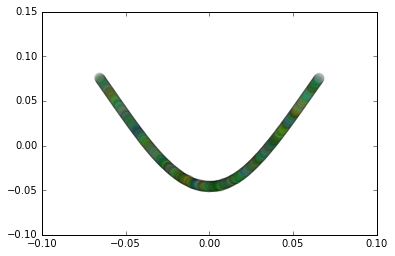

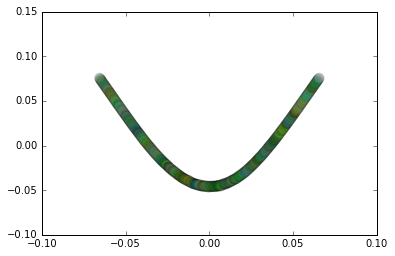

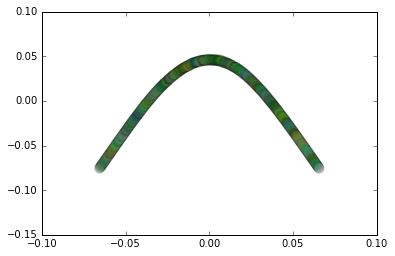

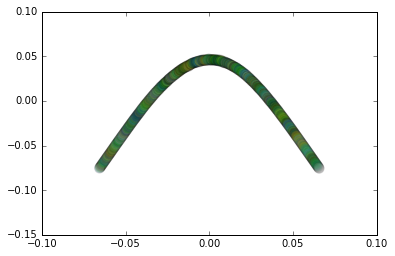

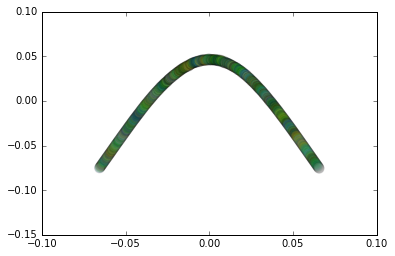

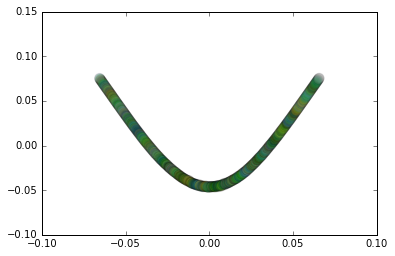

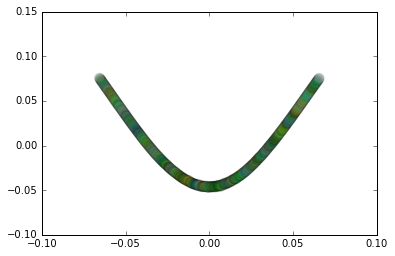

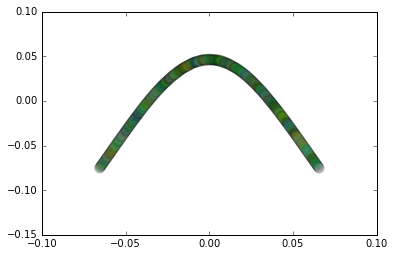

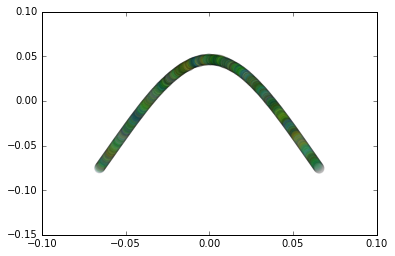

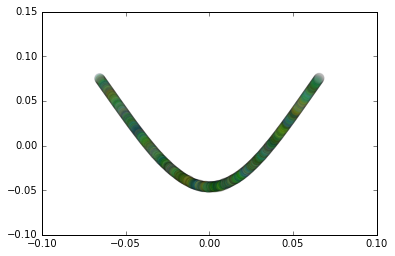

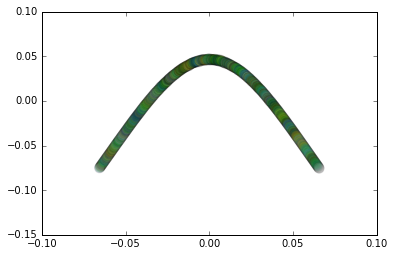

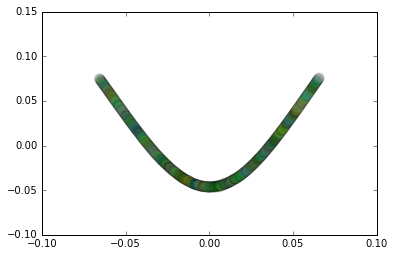

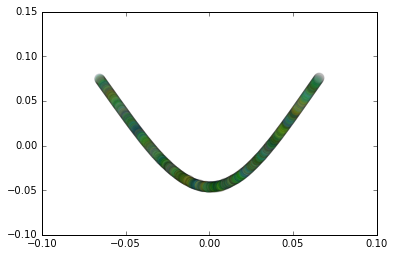

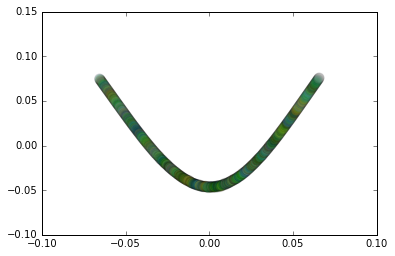

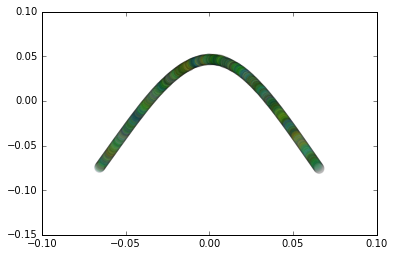

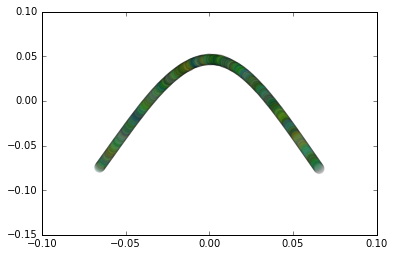

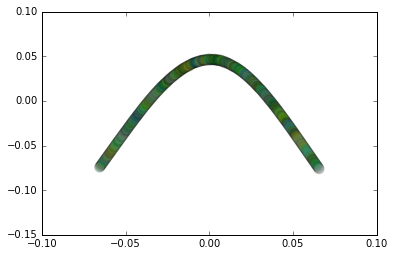

In [67]:
X = df.values
y = labels['0']
for i in xrange(10, 100, 1):
    node_position_model = manifold.LocallyLinearEmbedding(
        n_components=2, eigen_solver='dense', n_neighbors=i)

    embedding = node_position_model.fit_transform(X).T
    plt.scatter(embedding[0], embedding[1], s=100, c=labs, cmap=plt.cm.spectral, alpha=0.1)
    plt.show()

In [48]:
labs

array([[  0,   1],
       [  1,   2],
       [  2,   2],
       ..., 
       [691,   4],
       [692,   4],
       [693,   0]])

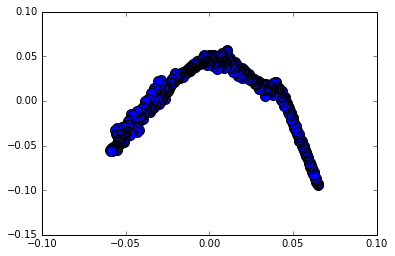

In [38]:
plt.scatter(embedding[0], embedding[1], s=100, c=labels 
            cmap=plt.cm.spectral)

array([[  0.00000000e+00,   2.47869095e+00,   1.08661769e-01, ...,
         -4.70096802e-01,  -2.54831421e-02,  -3.59792542e-02],
       [  1.00000000e+00,  -9.87769055e-01,  -2.16170975e-01, ...,
         -1.89780077e-01,   1.32708544e+00,   7.43255462e-01],
       [  2.00000000e+00,  -4.48541943e-01,   4.13231589e-03, ...,
         -1.89780077e-01,   7.88818353e-01,   1.58829425e-01],
       ..., 
       [  6.91000000e+02,   8.61009615e-01,  -7.92051472e-01, ...,
          1.32393023e+00,   2.15518866e+00,   2.20432056e+00],
       [  6.92000000e+02,   1.47726917e+00,   1.16827512e+00, ...,
          3.51040068e+00,   3.05758144e-01,   3.53638104e-01],
       [  6.93000000e+02,   7.83977170e-01,   6.48173482e-01, ...,
         -5.93436160e-01,  -9.88153130e-01,  -1.10742699e+00]])

Automatically created module for IPython interactive environment
Computing random projection
Computing PCA projection
Computing Linear Discriminant Analysis projection
Computing Isomap embedding
Done.
Computing LLE embedding
Done. Reconstruction error: 2.83646e-08
Computing modified LLE embedding
Done. Reconstruction error: 8.05608e-05
Computing Hessian LLE embedding
Done. Reconstruction error: 4.15414e-05
Computing LTSA embedding
Done. Reconstruction error: 4.15438e-05
Computing MDS embedding
Done. Stress: 42702.545968
Computing Totally Random Trees embedding
Computing Spectral embedding
Computing t-SNE embedding


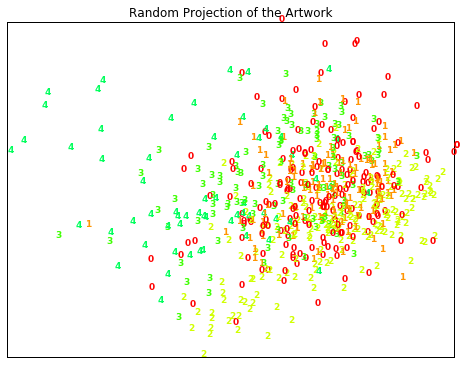

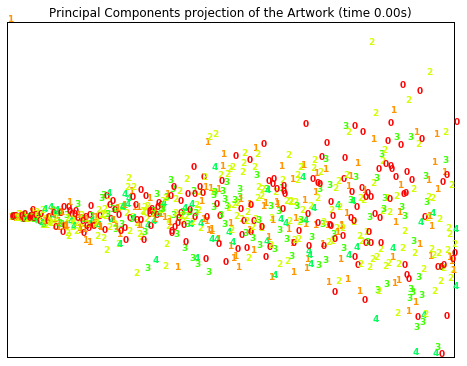

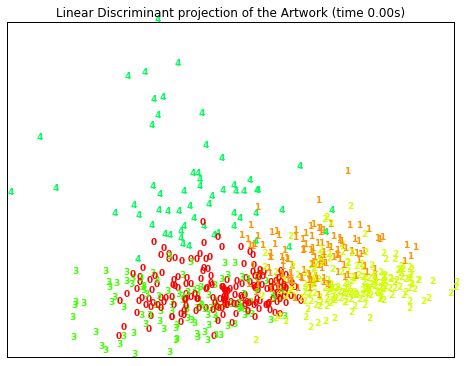

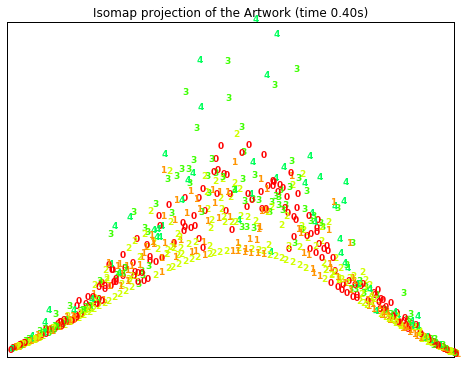

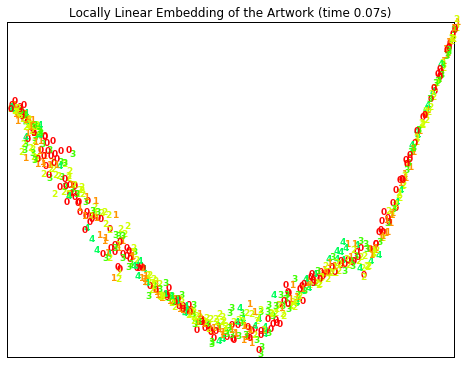

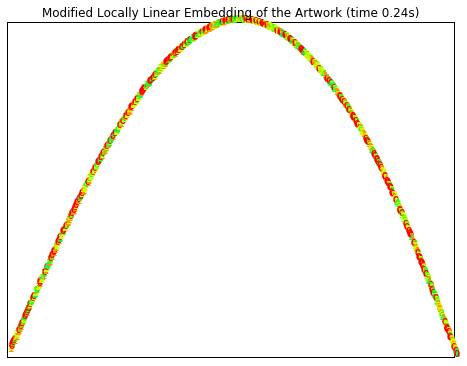

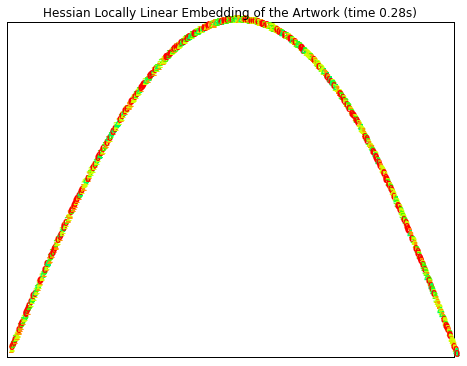

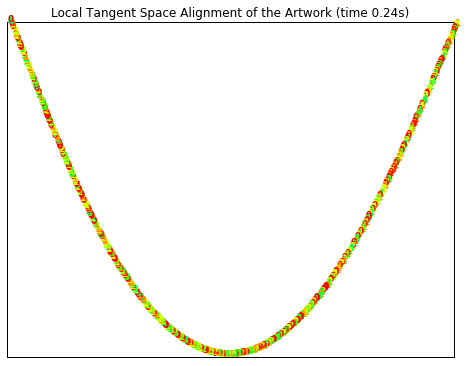

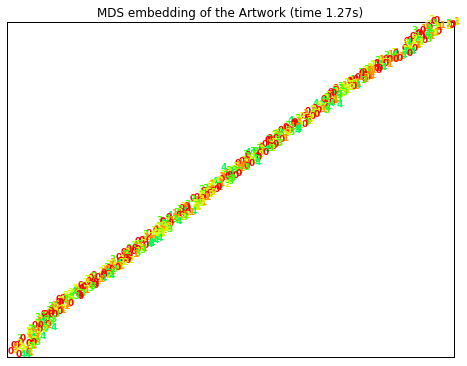

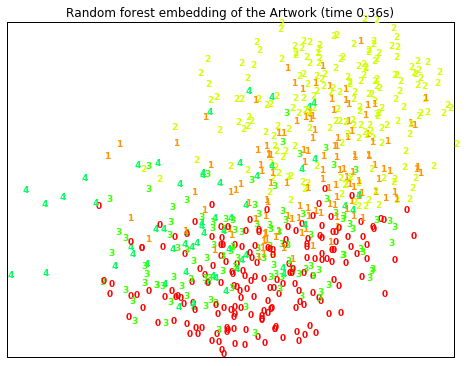

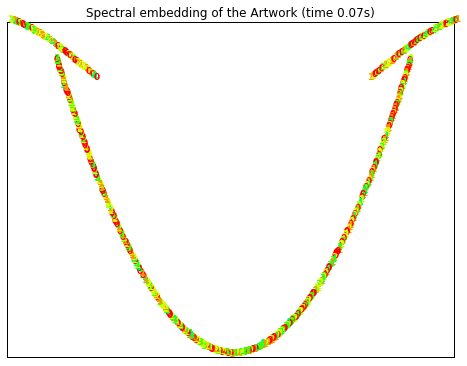

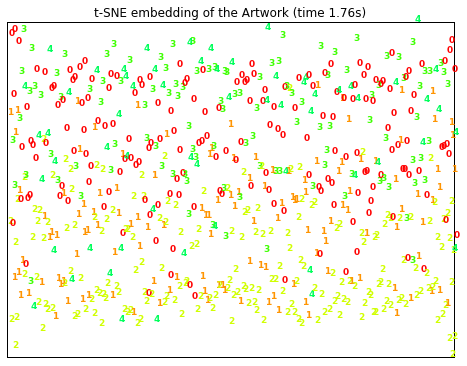

In [88]:
# Authors: Fabian Pedregosa <fabian.pedregosa@inria.fr>
#          Olivier Grisel <olivier.grisel@ensta.org>
#          Mathieu Blondel <mathieu@mblondel.org>
#          Gael Varoquaux
# License: BSD 3 clause (C) INRIA 2011

print(__doc__)
from time import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

digits = datasets.load_digits(n_class=6)
#X = digits.data
#y = digits.target
n_samples, n_features = X.shape
n_neighbors = 20


#----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    # color=plt.cm.Set1(y[i] / 10.),

    plt.figure(figsize=(8, 6))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]), color=plt.cm.hsv(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)


#----------------------------------------------------------------------
# Plot images of the digits
# n_img_per_row = 20
# img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
# for i in range(n_img_per_row):
#     ix = 10 * i + 1
#     for j in range(n_img_per_row):
#         iy = 10 * j + 1
#         img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

# plt.imshow(img, cmap=plt.cm.binary)
# plt.xticks([])
# plt.yticks([])
# plt.title('A selection from the 64-dimensional digits dataset')


#----------------------------------------------------------------------
# Random 2D projection using a random unitary matrix
print("Computing random projection")
rp = random_projection.SparseRandomProjection(n_components=2, random_state=42)
X_projected = rp.fit_transform(X)
plot_embedding(X_projected, "Random Projection of the Artwork")


#----------------------------------------------------------------------
# Projection on to the first 2 principal components

print("Computing PCA projection")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
plot_embedding(X_pca,
               "Principal Components projection of the Artwork (time %.2fs)" %
               (time() - t0))

#----------------------------------------------------------------------
# Projection on to the first 2 linear discriminant components

print("Computing Linear Discriminant Analysis projection")
X2 = X.copy()
X2.flat[::X.shape[1] + 1] += 0.01  # Make X invertible
t0 = time()
X_lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2).fit_transform(X2, y)
plot_embedding(X_lda,
               "Linear Discriminant projection of the Artwork (time %.2fs)" %
               (time() - t0))


#----------------------------------------------------------------------
# Isomap projection of the digits dataset
print("Computing Isomap embedding")
t0 = time()
X_iso = manifold.Isomap(n_neighbors, n_components=2).fit_transform(X)
print("Done.")
plot_embedding(X_iso,
               "Isomap projection of the Artwork (time %.2fs)" %
               (time() - t0))


#----------------------------------------------------------------------
# Locally linear embedding of the digits dataset
print("Computing LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='standard')
t0 = time()
X_lle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_lle,
               "Locally Linear Embedding of the Artwork (time %.2fs)" %
               (time() - t0))


#----------------------------------------------------------------------
# Modified Locally linear embedding of the digits dataset
print("Computing modified LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='modified')
t0 = time()
X_mlle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_mlle,
               "Modified Locally Linear Embedding of the Artwork (time %.2fs)" %
               (time() - t0))


#----------------------------------------------------------------------
# HLLE embedding of the digits dataset
print("Computing Hessian LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='hessian')
t0 = time()
X_hlle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_hlle,
               "Hessian Locally Linear Embedding of the Artwork (time %.2fs)" %
               (time() - t0))


#----------------------------------------------------------------------
# LTSA embedding of the digits dataset
print("Computing LTSA embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='ltsa')
t0 = time()
X_ltsa = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_ltsa,
               "Local Tangent Space Alignment of the Artwork (time %.2fs)" %
               (time() - t0))

#----------------------------------------------------------------------
# MDS  embedding of the digits dataset
print("Computing MDS embedding")
clf = manifold.MDS(n_components=2, n_init=1, max_iter=100)
t0 = time()
X_mds = clf.fit_transform(X)
print("Done. Stress: %f" % clf.stress_)
plot_embedding(X_mds,
               "MDS embedding of the Artwork (time %.2fs)" %
               (time() - t0))

#----------------------------------------------------------------------
# Random Trees embedding of the digits dataset
print("Computing Totally Random Trees embedding")
hasher = ensemble.RandomTreesEmbedding(n_estimators=200, random_state=0,
                                       max_depth=5)
t0 = time()
X_transformed = hasher.fit_transform(X)
pca = decomposition.TruncatedSVD(n_components=2)
X_reduced = pca.fit_transform(X_transformed)

plot_embedding(X_reduced,
               "Random forest embedding of the Artwork (time %.2fs)" %
               (time() - t0))

#----------------------------------------------------------------------
# Spectral embedding of the digits dataset
print("Computing Spectral embedding")
embedder = manifold.SpectralEmbedding(n_components=2, random_state=0,
                                      eigen_solver="arpack")
t0 = time()
X_se = embedder.fit_transform(X)

plot_embedding(X_se,
               "Spectral embedding of the Artwork (time %.2fs)" %
               (time() - t0))

#----------------------------------------------------------------------
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne,
               "t-SNE embedding of the Artwork (time %.2fs)" %
               (time() - t0))

plt.show()
